In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
file_path = r"C:\Users\SukruAlkan\Desktop\football-player-position.csv"
df = pd.read_csv(file_path)



In [155]:
df.head()


,Age,Height,Matches,Minutes/Match,Goals/Match,Assists/Match,Yellow Cards/Match,Red Cards/Match,Shots/Match,Pass Success Rate,Aerials Won,class
0,25.0,192.0,224.0,86.986607,0.049107,0.062500,0.187500,0.008929,0.5,85.3,2.2,Defender
1,27.0,189.0,67.0,69.343284,0.552239,0.134328,0.059701,0.000000,2.0,73.6,1.1,Forward
2,21.0,182.0,68.0,62.735294,0.191176,0.044118,0.073529,0.000000,1.7,83.8,0.3,Midfielder
3,25.0,189.0,58.0,89.017241,0.000000,0.000000,0.086207,0.000000,0.0,74.3,0.3,Goalkeeper
4,25.0,180.0,173.0,55.774566,0.075145,0.080925,0.144509,0.017341,0.9,82.4,0.3,Midfielder


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3611 non-null   float64
 1   Height              3611 non-null   float64
 2   Matches             3611 non-null   float64
 3   Minutes/Match       3611 non-null   float64
 4   Goals/Match         3611 non-null   float64
 5   Assists/Match       3611 non-null   float64
 6   Yellow Cards/Match  3611 non-null   float64
 7   Red Cards/Match     3611 non-null   float64
 8   Shots/Match         3611 non-null   float64
 9   Pass Success Rate   3611 non-null   float64
 10  Aerials Won         3611 non-null   float64
 11  class               3611 non-null   object 
dtypes: float64(11), object(1)
memory usage: 338.7+ KB


In [157]:
df.shape[0]

3611

In [158]:
df.describe()


,Age,Height,Matches,Minutes/Match,Goals/Match,Assists/Match,Yellow Cards/Match,Red Cards/Match,Shots/Match,Pass Success Rate,Aerials Won
count,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000
mean,25.177236,183.106896,92.432290,59.844675,0.068348,0.045808,0.123494,0.007286,0.691083,76.973941,0.954002
std,4.318631,6.916693,97.730754,22.740868,0.090305,0.058497,0.102099,0.024410,0.575009,11.082797,0.920597
min,16.000000,157.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,178.000000,18.000000,45.058462,0.000000,0.000000,0.054920,0.000000,0.300000,72.400000,0.300000
50%,25.000000,184.000000,60.000000,63.846154,0.038462,0.026667,0.113208,0.000000,0.600000,79.300000,0.600000
75%,28.000000,188.000000,134.000000,78.766407,0.097800,0.072568,0.176879,0.007519,1.000000,84.100000,1.400000
max,42.000000,206.000000,648.000000,92.394737,0.890830,1.000000,1.000000,0.500000,3.700000,100.000000,7.600000


In [159]:
df.isnull().sum()


Age                   0
Height                0
Matches               0
Minutes/Match         0
Goals/Match           0
Assists/Match         0
Yellow Cards/Match    0
Red Cards/Match       0
Shots/Match           0
Pass Success Rate     0
Aerials Won           0
class                 0
dtype: int64

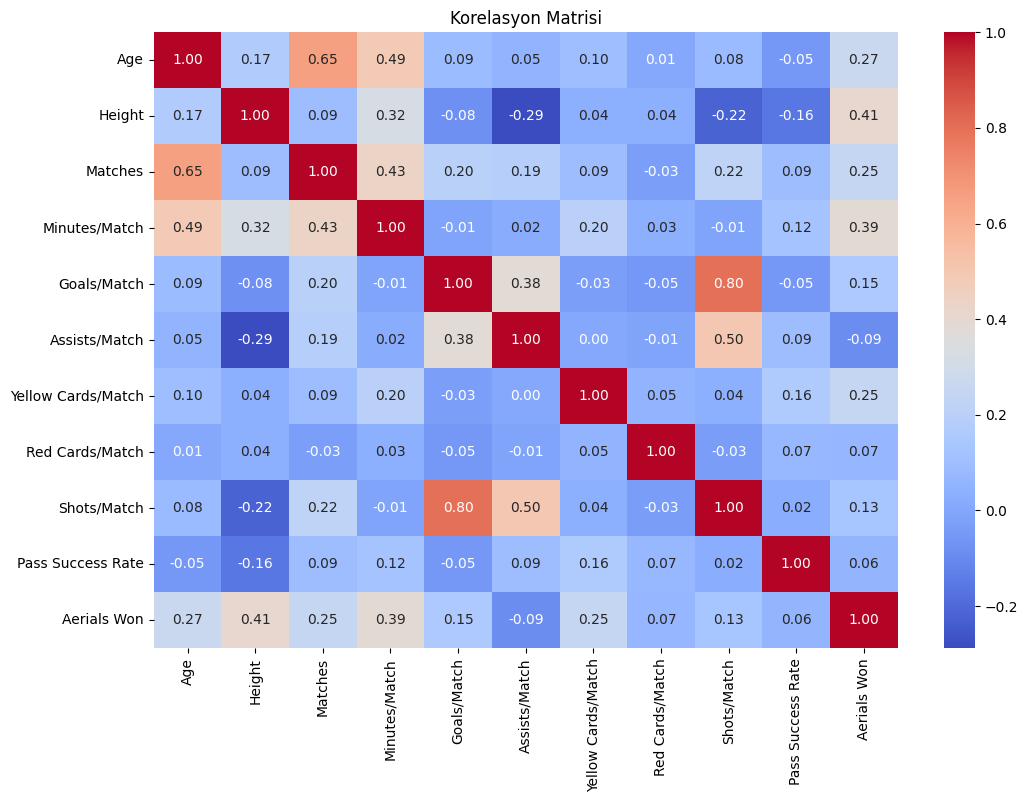

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


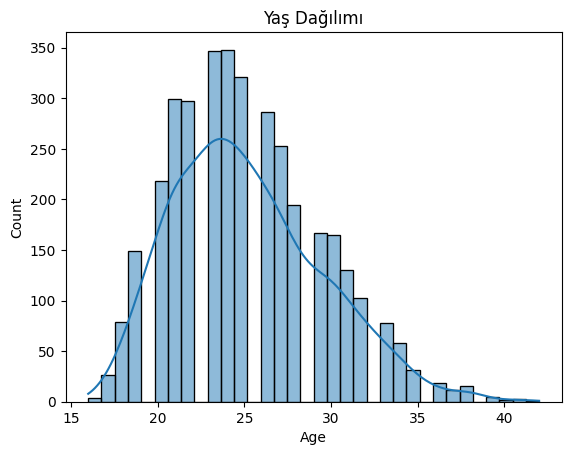

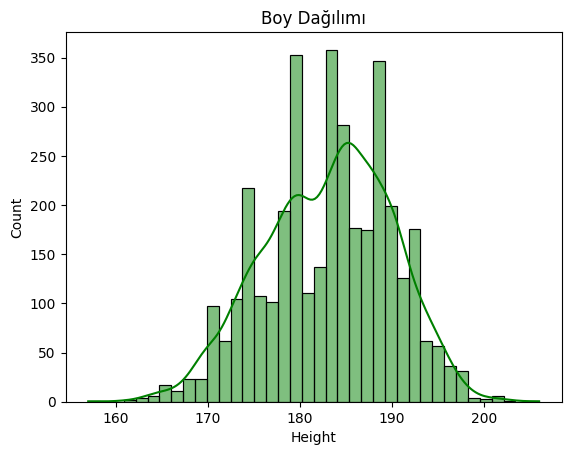

In [161]:
sns.histplot(df["Age"], kde=True)
plt.title("Yaş Dağılımı")
plt.show()

sns.histplot(df["Height"], kde=True, color="green")
plt.title("Boy Dağılımı")
plt.show()


Aykırı değer sayısı: 342


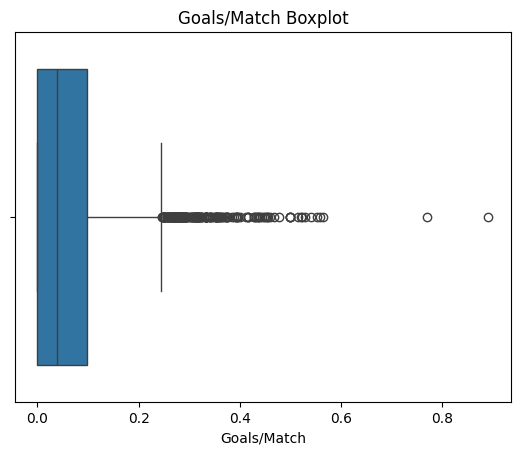

In [162]:
z_scores = zscore(df.select_dtypes(include=["float64", "int64"]))
outliers = (np.abs(z_scores) > 3).any(axis=1)

print(f"Aykırı değer sayısı: {outliers.sum()}")

# Aykırıları görselleştir (örnek olarak "Goals/Match")
sns.boxplot(x=df["Goals/Match"])
plt.title("Goals/Match Boxplot")
plt.show()


IQR: 0.0978000956480153
Aykırı sınırlar: -0.15 - 0.24


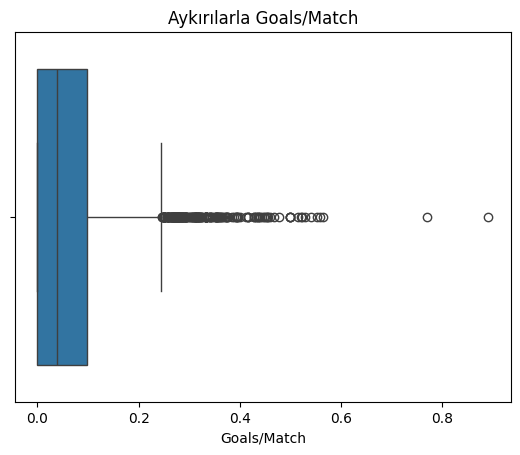

In [163]:
# Hedef sütunu seç
col = "Goals/Match"

# Q1, Q3 ve IQR hesapla
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst eşikleri hesapla
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Aykırı sınırlar: {lower_bound:.2f} - {upper_bound:.2f}")

# Aykırı değerleri filtrele (temizlenmiş dataframe)
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
sns.boxplot(x=df[col])
plt.title("Aykırılarla Goals/Match")
plt.show()

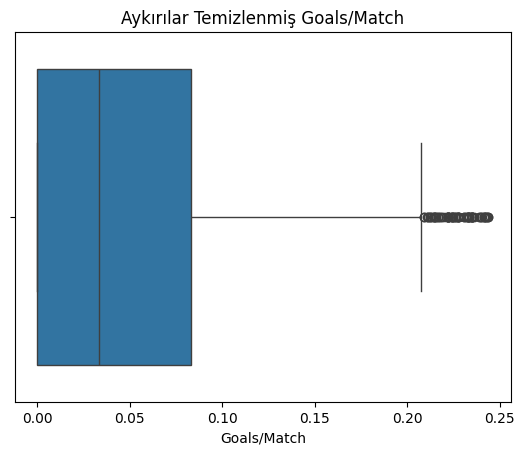

In [164]:
sns.boxplot(x=df_cleaned[col])
plt.title("Aykırılar Temizlenmiş Goals/Match")
plt.show()


In [165]:
# Sadece forvetleri al
forwards = df[df["class"] == "Forward"].copy()

# Z-score ile Pass Success Rate karşılaştırması
forwards["Scorer"] = zscore(forwards["Goals/Match"])

# En teknik forveti bul
forwards.sort_values("Scorer", ascending=False).head(5)



,Age,Height,Matches,Minutes/Match,Goals/Match,Assists/Match,Yellow Cards/Match,Red Cards/Match,Shots/Match,Pass Success Rate,Aerials Won,class,Scorer
240,24.0,194.0,229.0,77.890830,0.890830,0.157205,0.091703,0.000000,3.4,71.8,1.3,Forward,5.133693
68,36.0,185.0,623.0,82.150883,0.768860,0.160514,0.091493,0.003210,3.7,74.5,2.0,Forward,4.276556
1061,30.0,201.0,156.0,62.807692,0.564103,0.070513,0.108974,0.000000,2.5,71.2,3.3,Forward,2.837624
1910,23.0,182.0,86.0,67.930233,0.558140,0.116279,0.116279,0.011628,2.8,68.2,1.2,Forward,2.795719
1,27.0,189.0,67.0,69.343284,0.552239,0.134328,0.059701,0.000000,2.0,73.6,1.1,Forward,2.754252
